# Rotated pole mapping

This example uses several visualisation methods to achieve an array of
differing images, including:
- Visualisation of point based data
- Contouring of point based data
- Block plot of contiguous bounded data
- Non native projection and a Natural Earth shaded relief image underlay

Load some test data.

In [1]:
import iris

path = iris.sample_data_path('rotated_pole.nc')
air_pressure = iris.load_cube(path)
air_pressure

<iris 'Cube' of air_pressure_at_sea_level / (Pa) (grid_latitude: 22; grid_longitude: 36)>

Set up the plotting libraries

In [2]:
%matplotlib inline
import iris.plot as iplt
import iris.quickplot as qplt
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [3]:
rcParams['figure.figsize'] = (12, 8)

## Point plot showing data values & a colorbar

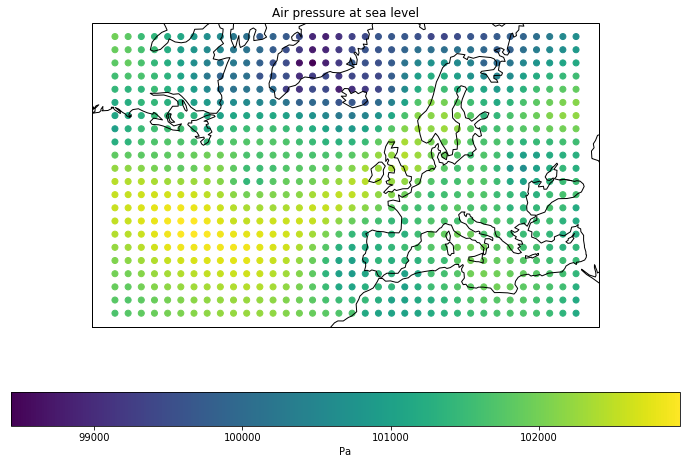

In [4]:
points = qplt.points(air_pressure, c=air_pressure.data)
cb = plt.colorbar(points, orientation='horizontal')
cb.set_label(air_pressure.units)
plt.gca().coastlines();

## Filled contour of the point based data

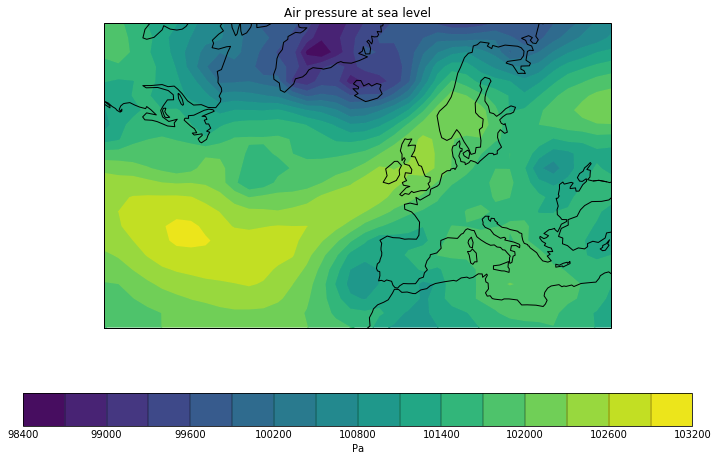

In [5]:
qplt.contourf(air_pressure, 15)
plt.gca().coastlines();

## Filled contour overlayed by coloured point data

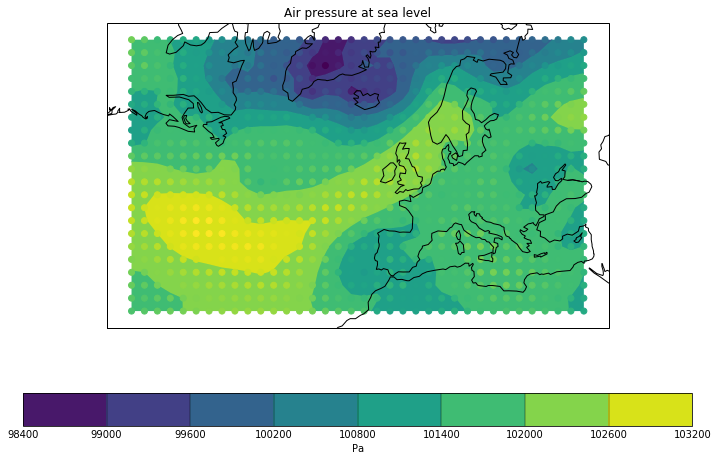

In [6]:
qplt.contourf(air_pressure)
iplt.points(air_pressure, c=air_pressure.data)
plt.gca().coastlines();

For the purposes of this example, add some bounds to the latitude and longitude

In [7]:
air_pressure.coord('grid_latitude').guess_bounds()
air_pressure.coord('grid_longitude').guess_bounds()

## Block plot

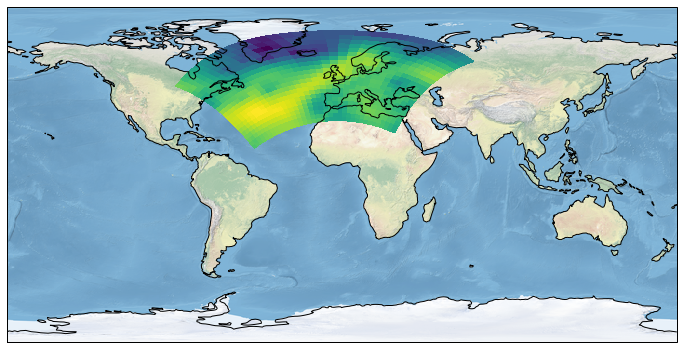

In [8]:
import cartopy.crs as ccrs

plt.axes(projection=ccrs.PlateCarree())
iplt.pcolormesh(air_pressure)
plt.gca().stock_img()
plt.gca().coastlines();